# Classify whether Breast cancer is begnign or malignant

# Import the required Scikit-Learn Libraries as shown:

In [12]:
#data processing, CSV file I/O 
import pandas as pd
#linear algebra  
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
#Feature Scaling
from sklearn.preprocessing import StandardScaler
#Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix , f1_score

# Reading our dataset

In [13]:
# Read a CSV file into a Pandas DataFrame
dataset=pd.read_csv("C:/Users/RTX/Documents/breast-cancer.csv")
print(len(dataset))

569


# Showing first five rows of our dataset

In [14]:
# Display the first few rows of the DataFrame
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [16]:
print("Number of Rows :" , dataset.shape[0])
print("Number of Columns :" , dataset.shape[1])

Number of Rows : 569
Number of Columns : 32


In [17]:
dataset.isna().head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
dataset.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# let's get rid of "id" because we don't need to use them while diagnosing whether the patient has a cancer or not.


In [19]:
dataset=dataset.drop(["id"], axis=1)

In [20]:
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
M = dataset[dataset.diagnosis == "M"]
M.head(10)
B = dataset[dataset.diagnosis == "B"]
B.head(10)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
19,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
48,B,12.050,14.63,78.04,449.3,0.10310,0.09092,0.06592,0.027490,0.1675,...,13.760,20.70,89.88,582.6,0.14940,0.21560,0.30500,0.06548,0.2747,0.08301
49,B,13.490,22.30,86.91,561.0,0.08752,0.07698,0.04751,0.033840,0.1809,...,15.150,31.82,99.00,698.8,0.11620,0.17110,0.22820,0.12820,0.2871,0.06917
50,B,11.760,21.60,74.72,427.9,0.08637,0.04966,0.01657,0.011150,0.1495,...,12.980,25.72,82.98,516.5,0.10850,0.08615,0.05523,0.03715,0.2433,0.06563
51,B,13.640,16.34,87.21,571.8,0.07685,0.06059,0.01857,0.017230,0.1353,...,14.670,23.19,96.08,656.7,0.10890,0.15820,0.10500,0.08586,0.2346,0.08025
52,B,11.940,18.24,75.71,437.6,0.08261,0.04751,0.01972,0.013490,0.1868,...,13.100,21.33,83.67,527.2,0.11440,0.08906,0.09203,0.06296,0.2785,0.07408


# Data Visualization

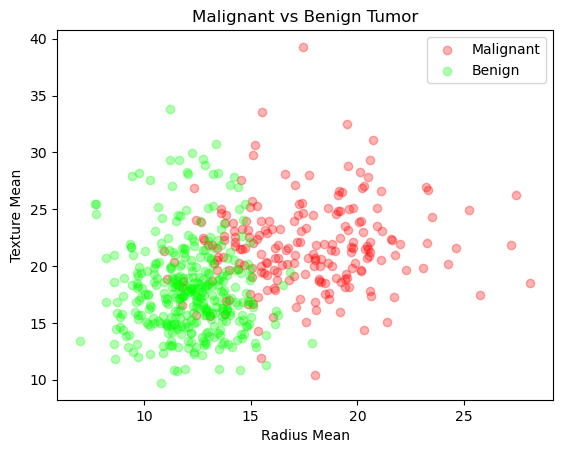

In [22]:
plt.title("Malignant vs Benign Tumor") 
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean") 
plt.scatter(M.radius_mean, M.texture_mean, color = "red", label = "Malignant", alpha = 0.3) 
plt.scatter(B.radius_mean, B.texture_mean, color = "lime", label = "Benign", alpha = 0.3)
plt.legend() 
plt.show()


In [23]:
dataset["diagnosis"]=dataset["diagnosis"].map({'B':0,'M':1}).astype(int)

In [24]:
x = dataset.drop(["diagnosis"], axis = 1)
y = dataset.diagnosis.values

In [25]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [26]:
#Feature Scaling
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.fit_transform(x_test)

In [27]:
k = range(1,100,2) 
testing_accuracy = []
training_accuracy = []
score = 0 
best_k=0
y_predict_test=0

In [28]:
for i in k: 
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train) 
    y_predict_train = knn.predict(x_train)
    training_accuracy.append(accuracy_score(y_train, y_predict_train)) 
    y_predict_test = knn.predict(x_test)
    acc_score = accuracy_score(y_test,y_predict_test)
    testing_accuracy.append(acc_score) 
    if score < acc_score: 
        score = acc_score 
        best_k = i


In [29]:
print(score)

0.9649122807017544


In [30]:
print(best_k)

3


# Evaluate classification of KNN

This is the best K for KNeighbors Classifier:  3 
Accuracy score is:  0.9649122807017544


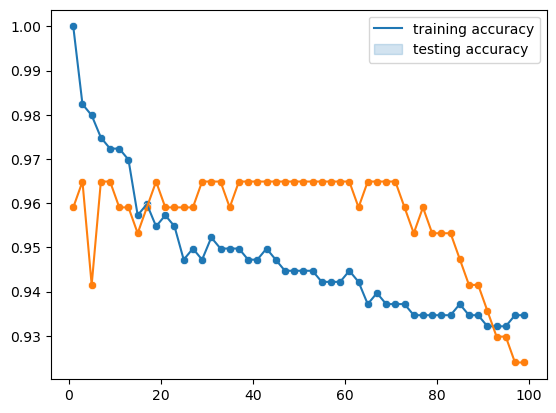

In [31]:
sns.lineplot(x=k, y=training_accuracy)
sns.scatterplot(x=k, y=training_accuracy)
sns.lineplot(x=k, y=testing_accuracy)
sns.scatterplot(x=k,y=testing_accuracy)
plt.legend(['training accuracy', 'testing accuracy'])
print('This is the best K for KNeighbors Classifier: ', best_k, '\nAccuracy score is: ', score)


This is the best K for KNeighbors Classifier: 3
Accuracy score is: 0.9649122807017544


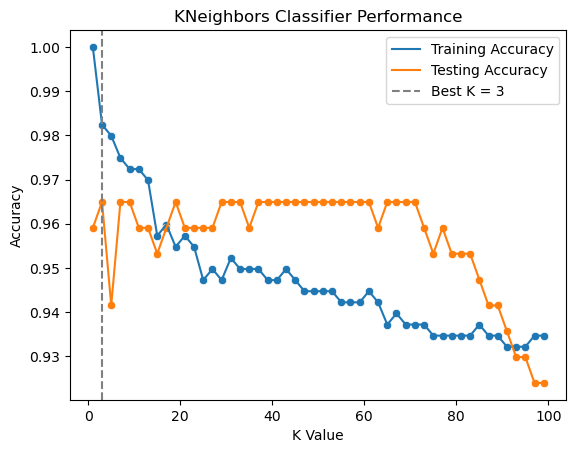

In [32]:
# Create a new figure
plt.figure()

# Plot training accuracy as a line and scatter plot
sns.lineplot(x=k, y=training_accuracy, label='Training Accuracy')
sns.scatterplot(x=k, y=training_accuracy)

# Plot testing accuracy as a line and scatter plot
sns.lineplot(x=k, y=testing_accuracy, label='Testing Accuracy')
sns.scatterplot(x=k, y=testing_accuracy)

# Add legend, labels, and title
plt.legend()
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('KNeighbors Classifier Performance')

# Indicate the best K value
plt.axvline(x=best_k, color='gray', linestyle='--', label='Best K = {}'.format(best_k))

# Display the legend
plt.legend()

# Print information about the best K and accuracy score
print('This is the best K for KNeighbors Classifier:', best_k)
print('Accuracy score is:', score)

# Show the plot
plt.show()

In [33]:
# Perform cross-validation to choose the best k
best_score = 0
best_k = 0

for k in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_classifier, x_train, y_train, cv=5)  # 5-fold cross-validation
    
    mean_score = scores.mean()
    if mean_score > best_score:
        best_score = mean_score
        best_k = k

print("Best k:", best_k)
print("Best Score:", best_score)

Best k: 3
Best Score: 0.9674367088607594


In [34]:

#Feature Scaling
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.fit_transform(x_test)

In [36]:
# Define a list of k values to test
k_values = [1, 3, 5, 7, 9]  # or any range of values you want to try
training_accuracy = []
testing_accuracy = []
best_k = None
score = 0

for i in k_values: 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train) 
    
    # Predict and calculate training accuracy
    y_predict_train = knn.predict(x_train)
    training_accuracy.append(accuracy_score(y_train, y_predict_train)) 
    
    # Predict and calculate testing accuracy
    y_predict_test = knn.predict(x_test)
    acc_score = accuracy_score(y_test, y_predict_test)
    testing_accuracy.append(acc_score) 
    
    # Update the best score and k if current score is better
    if acc_score > score: 
        score = acc_score 
        best_k = i

print(f'Best k: {best_k} with accuracy: {score}')


Best k: 3 with accuracy: 0.9649122807017544


In [37]:
print(score)

0.9649122807017544


In [38]:
print(best_k)

3


In [39]:
#Evalute the model
cm=confusion_matrix(y_test,y_predict_test)
print(cm)
print(f1_score(y_test, y_predict_test))

[[107   1]
 [  5  58]]
0.9508196721311476
